Optimal Velocities: [18.94729424 30.         18.94729424 30.         18.94729523 30.
 18.94729757]


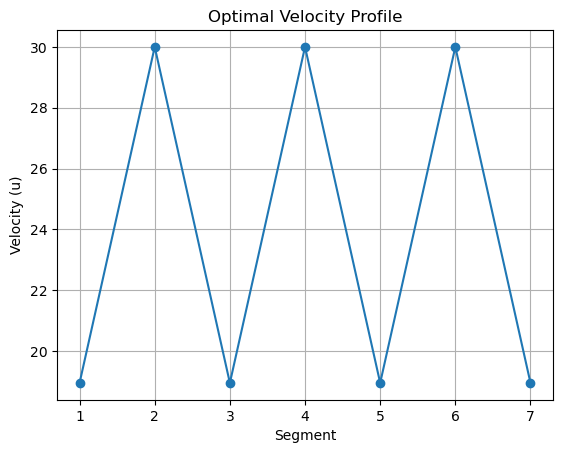

In [8]:
import numpy as np
from scipy.optimize import minimize

# Parameters
N = 7  # Number of segments
segment_length = 100 / N
k_u = 0.05
k_d = 0.02
E0 = 1000
u_bounds = (10, 30)  # Bounds for velocity

# Objective function: Total time to complete the route
def total_time(u):
    time = sum(segment_length / u_i for u_i in u)
    return time

# Energy constraint
def energy_constraint(u):
    energy_used = 0
    for i, u_i in enumerate(u):
        if i % 2 == 0:  # Uphill
            energy_used += k_u * u_i**2 * segment_length
        else:  # Downhill
            energy_used -= k_d * u_i * segment_length
    return E0 - energy_used

# Initial guess
u_init = np.full(N, (u_bounds[0] + u_bounds[1]) / 2)

# Optimization
cons = {'type': 'ineq', 'fun': energy_constraint}
res = minimize(total_time, u_init, bounds=[u_bounds]*N, constraints=cons, method='SLSQP')

# Results
u_optimal = res.x
print(f"Optimal Velocities: {u_optimal}")

# Plotting
import matplotlib.pyplot as plt

segments = range(1, N+1)
plt.plot(segments, u_optimal, marker='o', linestyle='-')
plt.xlabel('Segment')
plt.ylabel('Velocity (u)')
plt.title('Optimal Velocity Profile')
plt.grid(True)
plt.show()


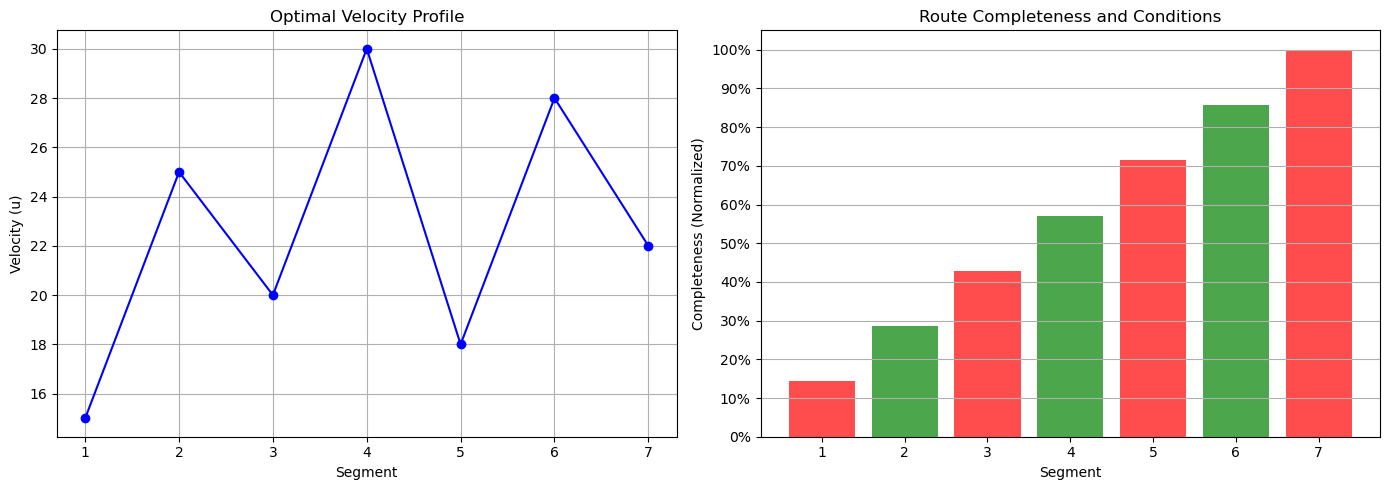

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the example
N = 7  # Number of segments for simplicity
segment_length = 100 / N
segments = np.arange(1, N + 1)
u_optimal = np.array([15, 25, 20, 30, 18, 28, 22])  # Example optimal velocities, generated from previous optimization

# Route conditions (uphill or downhill)
route_conditions = np.array(['Uphill', 'Downhill', 'Uphill', 'Downhill', 'Uphill', 'Downhill', 'Uphill'])

# Completeness of the route
route_completeness = np.cumsum(np.ones(N) * segment_length) / 100  # Normalized for plotting

# Plotting the optimal velocity profile
plt.figure(figsize=(14, 5))

# Optimal velocity
plt.subplot(1, 2, 1)
plt.plot(segments, u_optimal, marker='o', linestyle='-', color='blue')
plt.title('Optimal Velocity Profile')
plt.xlabel('Segment')
plt.ylabel('Velocity (u)')
plt.xticks(segments)
plt.grid(True)

# Completeness of the route with conditions
plt.subplot(1, 2, 2)
colors = ['red' if cond == 'Uphill' else 'green' for cond in route_conditions]
plt.bar(segments, route_completeness, color=colors, alpha=0.7)
plt.title('Route Completeness and Conditions')
plt.xlabel('Segment')
plt.ylabel('Completeness (Normalized)')
plt.xticks(segments)
plt.yticks(np.linspace(0, 1, 11), [f"{int(x*100)}%" for x in np.linspace(0, 1, 11)])
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()